In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.sparse as sp
import scipy.sparse.linalg as spla

from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

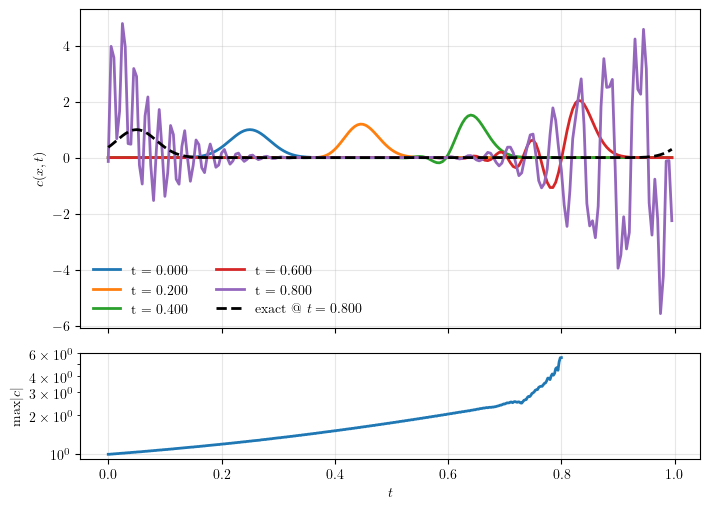

In [10]:
L = 1.0 
u = 1.0
Nx = 200
dx = L / Nx
CFL = 0.4
dt = CFL * dx / u
Nt = 400

x = np.linspace(0, L, Nx, endpoint=False)

c0 = np.exp(-((x - 0.25*L) / (0.05*L))**2)
c = c0.copy()

snap_steps = [0, 100, 200, 300, 400]
snaps = {}
amp = np.empty(Nt + 1)
amp[0] = np.max(np.abs(c))

for n in range(1, Nt + 1):
    # FTCS update with periodic BCs via roll
    c = c - 0.5 * CFL * (np.roll(c, -1) - np.roll(c, 1))
    amp[n] = np.max(np.abs(c))
    if n in snap_steps:
        snaps[n] = c.copy()

# exact (periodic) solution for final time (pure shift)
t_final = Nt * dt
x_shift = (x - u * t_final) % L
c_exact = np.interp(x_shift, x, c0, period=L)

fig, (ax, ax2) = plt.subplots(
    2, 1, figsize=(7.2, 5.2), sharex=True,
    gridspec_kw={"height_ratios": [3, 1]}
)

for n in snap_steps:
    y = c0 if n == 0 else snaps[n]
    ax.plot(x, y, lw=2, label=f"t = {n*dt:.3f}")

ax.plot(x, c_exact, "k--", lw=2, label=f"exact @ $t = {t_final:.3f}$")
ax.set_ylabel("$c(x,t)$")
# ax.set_title("FTCS for 1D Advection: Non-physical Oscillations / Instability")
ax.grid(True, alpha=0.3)
ax.legend(ncol=2, frameon=False)

ax2.semilogy(np.arange(Nt + 1) * dt, amp, lw=2)
ax2.set_xlabel("$t$")
ax2.set_ylabel(r"$\mathrm{max}|c|$")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("../../../figs/pde/advection_ftcs_instability.pdf", bbox_inches="tight", transparent=True)
plt.show()

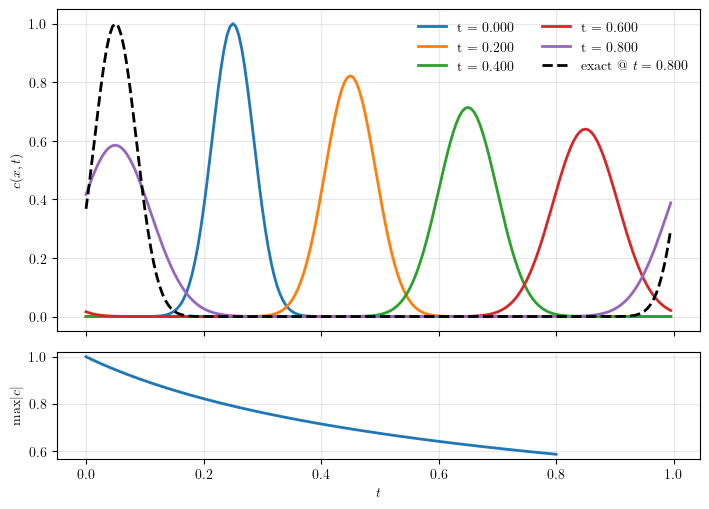

In [12]:
L = 1.0
u = 1.0
Nx = 200
dx = L / Nx
CFL = 0.4
dt = CFL * dx / u
Nt = 400

x = np.linspace(0, L, Nx, endpoint=False)

c0 = np.exp(-((x - 0.25*L) / (0.05*L))**2)
c = c0.copy()

snap_steps = [0, 100, 200, 300, 400]
snaps = {}

peak = np.empty(Nt + 1)
peak[0] = np.max(c)

for n in range(1, Nt + 1):
    # upwind (FTBS) update: uses upstream value only (periodic BCs via roll)
    c = c - CFL * (c - np.roll(c, 1))
    peak[n] = np.max(c)
    if n in snap_steps:
        snaps[n] = c.copy()

# exact (periodic) solution for final time (pure shift)
t_final = Nt * dt
x_shift = (x - u * t_final) % L
c_exact = np.interp(x_shift, x, c0, period=L)

fig, (ax, ax2) = plt.subplots(
    2, 1, figsize=(7.2, 5.2), sharex=True,
    gridspec_kw={"height_ratios": [3, 1]}
)

# concentration snapshots
for n in snap_steps:
    y = c0 if n == 0 else snaps[n]
    ax.plot(x, y, lw=2, label=f"t = {n*dt:.3f}")

ax.plot(x, c_exact, "k--", lw=2, label=f"exact @ $t = {t_final:.3f}$")
ax.set_ylabel("$c(x,t)$")
# ax.set_title("Upwind (FTBS) for 1D Advection: Stable but Numerically Diffusive")
ax.grid(True, alpha=0.3)
ax.legend(ncol=2, frameon=False)

ax2.plot(np.arange(Nt + 1) * dt, peak, lw=2)
ax2.set_xlabel("$t$")
ax2.set_ylabel(r"$\mathrm{max}|c|$")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("../../../figs/pde/advection_upwind_diffusion.pdf", transparent=True, bbox_inches="tight")
plt.show()